In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [3]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.0,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
#     ax2.
#     ax2.set_xlim
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    return fig,ax1,ax2

/tmp/ipykernel_8631/502220095.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_8631/3880137176.py:135: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10**A,10**log10(f_nu2)/(1+redshift),label='Unattenuated')
/tmp/ipykernel_8631/3880137176.py:165: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10**A,10**log10(f_lambda2),label='Unattenuated')
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial

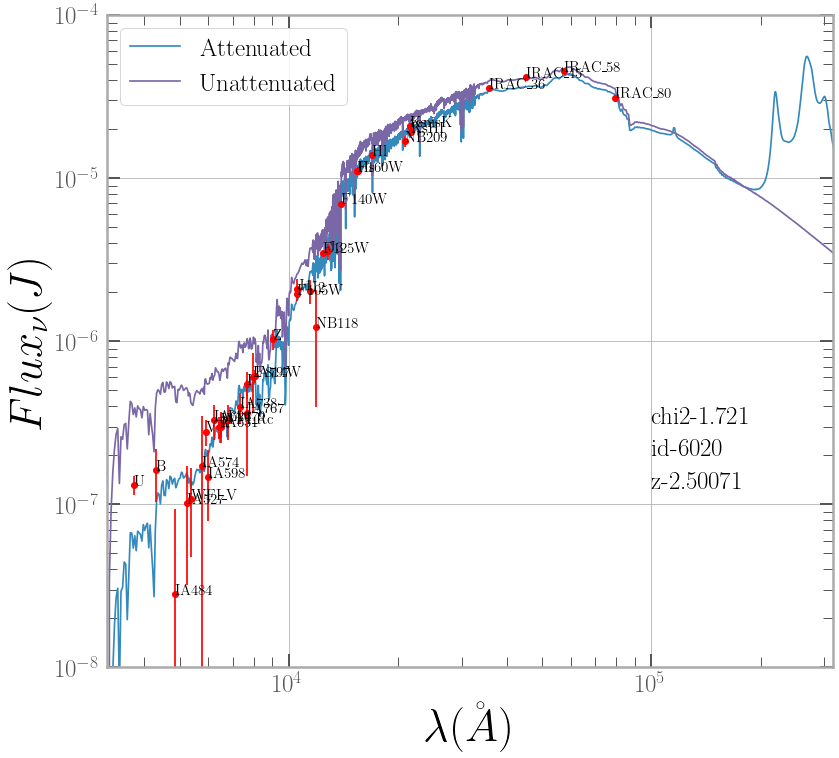

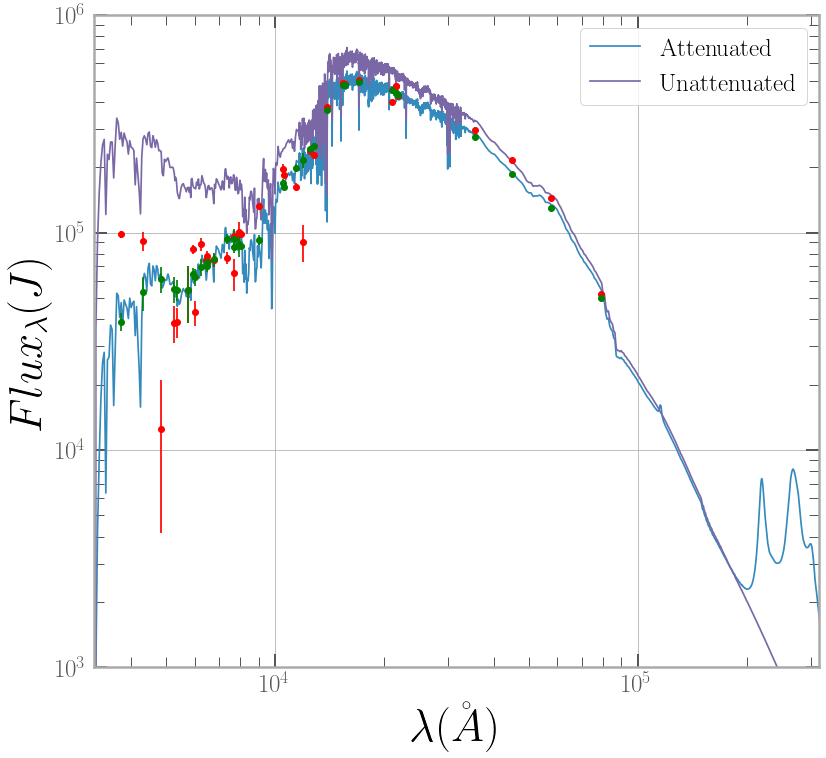

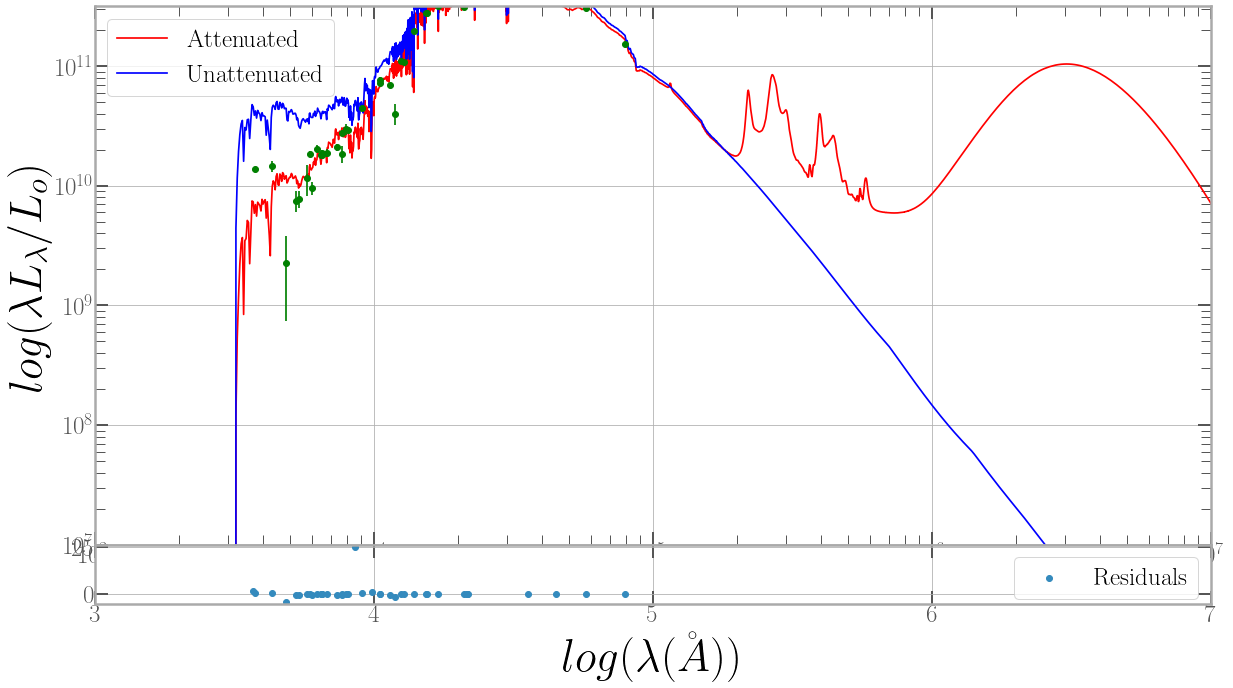

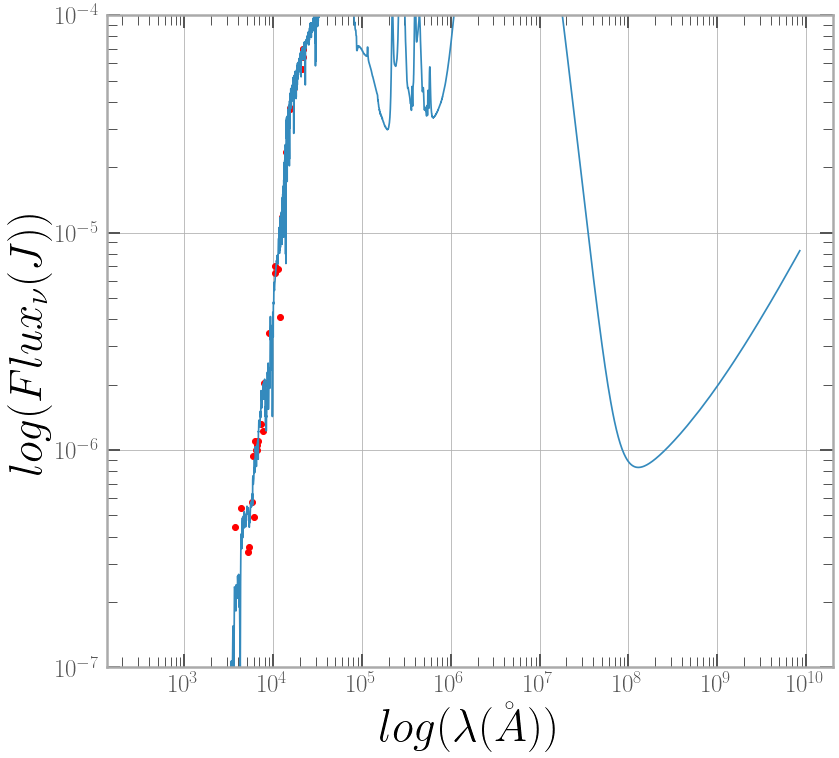

In [28]:
# %%capture
path = os.path.expanduser('~/Documents/forest/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
# Montague=pd.read_csv('Montagood.csv')
chestnut1=[]
sunshine1=[]
rainbow1=[]
# crap=array([1,1,1,1,1,1])
for Treesa in range(1):
#     potato=str(Montague['id'][Treesa])
    potato=str(6020)
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    chi2 = float(galaxy_fit.index[6].split()[2])
    chestnut1.append(chi2)
    Stellar_mass = float(galaxy_fit.index[8].split()[5])
    sunshine1.append(Stellar_mass)
    StarForm = float(galaxy_fit.index[8].split()[15])
    rainbow1.append(StarForm)
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

    short2=short2.drop(['Name'],axis=1)

    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

#Scuffed error calculation. yerr/y *0.434 = error for log plot
    f_lambda = light*f_nu/lambd**2
    f_lambda2 = light*f_nu2/lambd**2
    
    




#     error=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))
#     error=[]                                                                           
#     for i in range(len((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift)))):
#         grape=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2][i]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2][i]*(1+redshift))
#     #     list(error)
#     #     mylist = list()
#         error.append(grape)
#     #     print()
#     #     list.append(error)
#     # error   
    ###################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    ###################################################
    errtest=Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],3:len(Montague.iloc[0])][::2]
    flux = Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],2:len(Montague.iloc[0])][::2]
    flux_fit = galaxy_fit2.loc[1].apply(lambda x: float(x))
    errtest_fit = galaxy_fit2.loc[2].apply(lambda x: float(x))
#     L_flux=((1+redshift)*flux*3e14)/np.array(lambda_c)                                                                       
    Lum_vHz = galaxy_fit2.loc[10].apply(lambda x: float(x))
    flux_v =(Lum_vHz*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    flux_v = flux_v/10**-26                                                                       
#     p=['red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red']
    for i in range(len(flux_fit)):
        if np.array(flux_fit[i])<0:
            flux_v[i]=nan
            errtest[i]=0
        if np.array(Lum_vHz[i])<=0:
            errtest[i]=0
            
        
# fig=plt.figure(figsize=(15,8))
# ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
# ax.set_ylabel('$log(f_{\nu})$',fontsize='16')
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylim(bottom=-9.5, top=-3)
    fig,ax=FancyPlot(r'$\lambda (\AA)$',r'$Flux_{\nu} (J)$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(bottom=10**-8,top=10**-4)
    ax.set_xlim(left=10**3.5,right=10**5.5)
    plt.plot(10**A,10**log10(f_nu)/(1+redshift),label='Attenuated')
    plt.plot(10**A,10**log10(f_nu2)/(1+redshift),label='Unattenuated')
    plt.annotate('chi2-'+str(chi2),xy=(10**5,10**-6.5),size=25)
    plt.annotate('id-'+str(potato),xy=(10**5,10**-6.7),size=25)
    plt.annotate('z-'+str(redshift),xy=(10**5,10**-6.9),size=25)
    plt.legend()
#     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
    plt.errorbar(x=lambda_cA,y=flux,yerr=errtest,fmt='o',c='red')
#     plt.errorbar(x=lambda_cA,y=flux_v,yerr=errtest,fmt='o',c='green')
#     plt.errorbar(x=lambda_cA,y=flux_fit*(1+redshift)*0.001,yerr=errtest_fit,fmt='o',c='skyblue')
#     plt.errorbar(x=lambda_cA,y=flux_fit*(1+redshift),yerr=errtest_fit, fmt='o',c='black')
    for i in range(40):
        plt.annotate(Filters['Name'][i],xy=(lambda_cA[i],flux[i]),size=15)
#     plt.savefig('good'+'slideshow'+potato+'Flux'+'-Highz',bbox_inches='tight')
# SED
# ((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))

# Montague.iloc[0,2:len(Montague.iloc[0])]

# Montague.iloc[0,2:len(Montague.iloc[0])][::2]
###################################################################
    flux_lambda = np.array(flux)*light/lambda_cA**2
    flux_lambda_err = np.array(errtest)*light/lambda_cA**2
    flux_v_lambda = np.array(flux_v)*light/lambda_cA**2
    flux_v_lambda_err = np.array(errtest)*light/lambda_cA**2
    fig,ax=FancyPlot(r'$\lambda (\AA)$',r'$Flux_{\lambda} (J)$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(bottom=10**3,top=10**6)
    ax.set_xlim(left=10**3.5,right=10**5.5)
    plt.plot(10**A,10**log10(f_lambda),label='Attenuated')
    plt.plot(10**A,10**log10(f_lambda2),label='Unattenuated')
    plt.annotate(potato,xy=(10**4,10**-7))
    plt.legend()
#     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
    plt.errorbar(x=lambda_cA,y=flux_lambda*(1+redshift),yerr=flux_lambda_err,fmt='o',c='red')
    plt.errorbar(x=lambda_cA,y=flux_v_lambda*(1+redshift),yerr=flux_v_lambda_err,fmt='o',c='green')
#     plt.errorbar(x=lambda_cA,y=flux_fit*(1+redshift),yerr=errtest_fit, fmt='o',c='black')
###################################################################
#     for i in range(len(galaxy_fit)):
#         line = galaxy_fit.index[i].split(" ")
#         while("" in line):
#             line.remove("")
#         if len(line) !=40:
#             continue
#         str_line = " ".join(str(item) for item in line)
#         galaxy_fit2.loc[i]=str(str_line)


#     names = []
#     for i in range(len(Filters['Name'])):
#           names.append(Filters.iloc[i,0])
#     names
#     galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
#     galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    # galaxy_fit2

# # galaxy_fit2[]

# # Filters

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_nu = L_nu*(1+redshift)

    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

#     yerrz=0.434*(lL_lambda_err)/lL_lambda
#     lL_lambda=lL_lambda.tolist()
#     for i in range(len(lL_lambda)):
#         if lL_lambda[i]<0:
#             lL_lambda[i]=nan
#     for i in range(len(lL_lambda)):
#         if log10(yerrz[i]) > log10(lL_lambda[i]):
#             yerrz[i] = nan
# #     print(yerrz)

#     # import numpy as np
    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o


#     # D_nu = D*(arr2**2)/light#(lambda^2)/c * L_lambda
#     # print(D_nu)
#     # print(X)
#     # Flux_at = (D_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
#     # Flux_at=Flux_at/10**(-26) #Janksys
#     # Flux_at = Flux_at.value.tolist()
#     # print(Flux_at)

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  

#     # E_nu = E*(arr2**2)/light
#     # Flux_un = (E_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
#     # Flux_un = Flux_un/10**(-26) #Janksys
#     # Flux_un = Flux_un.value.tolist()

    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)
#     # Flux_at_log = log10(Flux_at) #log Janskys
#     # Flux_un_log = log10(Flux_un) #log Janskys
#     # print(Flux_at_log)
#     # print(Atten_log)

    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs*(1+redshift))/L_nu
    for i in range(len(Res)):
        if log10(-Res[i])>5:
            Res[i]=nan
# #     fig,ax=plt.subplots()
# #     plt.scatter(t,Res)
# #     ax.set_ylim(-1.2,1.2)

#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(\lambda L_\lambda /L_o )$', size_x=15,size_y=10)
    # ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
    # ax.set_ylabel('$log(\lambda L_\lambda /L_o )$',fontsize='16')
    # ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(f_{\nu})$')
#     ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
#     ax.set_xlim(left=min(A)/1.05,right=max(A)*1.05)
    fig,ax1,ax2=StackedPlot('',r'$log(\lambda L_\lambda /L_o )$',r'$log(\lambda (\AA))$','')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim(bottom=10**7, top=10**11.5)
    ax1.set_xlim(left=10**3,right=10**7)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(10**Qlog,10**Atten_log,label='Attenuated',c='red')
    ax1.plot(10**Qlog,10**Unatten_log,label='Unattenuated',c='blue')
    ax1.legend()
#     ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(10**t,10**z,yerr=lL_lambda_err,fmt='o',c='green')
#     axs[1] = plt.axes([0,0,1,1])
    # Manually set the position and relative size of the inset axes within ax1
#     ip = InsetPosition(ax, [0.2,0.,0.26,0.2])
#     ax2.set_axes_locator(ip)
    ax2.set_xlim(left=3,right=7)
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()
#     plt.savefig(potato+'Luminosity'+'-Highz')
###########################################################    
###########################################################
    x = 10**A
    y_at=x*10**B
    xx=x*1e4
    
#     flux = galaxy_fit2.loc[10].apply(lambda x: float(x))
    Lum_vHz = galaxy_fit2.loc[1].apply(lambda x: float(x))
    
    flux_v =(Lum_vHz*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    flux_v = flux_v/10**-26
    flux2=Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],2:len(Montague.iloc[0])][::2]
#     L_flux=((1+redshift)*(flux)*3e14)/np.array(lambda_c)
#     L_flux = flux
    
    L_flux2=((1+redshift)*(flux2)*3e14)/np.array(lambda_c)
    fig,ax=FancyPlot(r'$log(\lambda (\AA))$',r'$log(Flux_{\nu} (J))$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(bottom=10**-7,top=10**-4)
#     ax.set_xlim(left=10**3.5,right=10**5.5)
        
#     plt.plot(x,y_at)
#     p=['red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red']
    plt.scatter(lambda_cA,flux_v*(1+redshift),c='red')
    plt.plot(10**A,10**log10(f_nu),label='Attenuated')
#     plt.scatter(lambda_c,flux2,c=p)
    for i in range(40):
        plt.annotate(Filters['Name'][i],xy=(lambda_c[i],flux_v[i]))#, # these are the coordinates to position the label
                 #textcoords="offset points", # how to position the text
                 #xytext=(0,10), # distance from text to points (x,y)
                 #ha='center')
###########################################################
###########################################################


###########################################################
#     for i in range(len(galaxy_fit_s)):
#         line = galaxy_fit_s.index[i].split(" ")
#         while("" in line):
#             line.remove("")
#         if len(line) !=1:
#     #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
#             ok=pd.DataFrame(line)
#             galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
#             continue

#         str_line = " ".join(str(item) for item in line)
#         galaxy_fit3.loc[i]=str(str_line)


#     Properties=galaxy_fit3.T
#     Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
#     Properties.reset_index(inplace=True,drop=True)
#     for col in Properties.select_dtypes(['object']):
#         Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

#     fig,ax1,ax2,ax3=HexPlot(r'sSFR /$log(yr^{-1})$',r'Probability',r'Stellar Mass /$log(M_\odot)$','',r'SFR/$log(M_\odot yr^{-1})$',wspace=0.20)
# #     plt.figure(0)
# #     plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
# #     plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
# #     plt.figure(1)
#     ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
# #     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
#     damn =max(Properties.iloc[232:302]['B'])
# #     prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
#     prac =array([0,damn,damn,damn,0,nan])
# #     ax1.set_xlim(left=8,right=11)
#     ax1.bar(Properties.T[303],prac,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=-10,right=-7)
#     #     plt.figure(2)
# #     ax1.scatter(Percentiles_sSFR,Properties.T[254])
#     ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
#     damn2=max(Properties.iloc[305:375]['B'])
# #     prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
#     prac2 =array([0,damn2,damn2,damn2,0,nan])
# #     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
#     ax2.bar(Properties.T[376],prac2,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax2.set_xlim(left=9.5,right=10.5)
#     #     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
# #     ax3.scatter(Properties.T[664],crap)
# #     plt.figure(3)
#     ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
#     damn3=max(Properties.iloc[735:795]['B'])
# #     prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
#     prac3 =array([0,damn3,damn3,damn3,0,nan])
#     ax3.bar(Properties.T[796],prac3,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax3.set_xlim(left=1,right=3)
#     #     plt.figure(4)
# #     plt.savefig(potato+'Stellar Histograms'+'-Highzx',bbox_inches='tight')
#     fig,ax1,ax2,ax3=HexPlot(r'Luminosity /$log(L_\odot)$',r'Probability - Dust',r'Attenuation/$\tau_v^{ISM}$','',r'Mass /$log(M_\odot)$',wspace=0.20)
#     ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
# #     plt.figure(5)
# #     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
#     damn4=max(Properties.iloc[378:448]['B'])
# #     prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
#     prac4 =array([0,damn4,damn4,damn4,0,nan])
#     ax1.bar(Properties.T[449],prac4,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=11,right=13)
#     ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
#     damn5=max(Properties.iloc[589:669]['B'])
# #     prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
#     prac5 =array([0,damn5,damn5,damn5,0,nan])
# #     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
#     ax2.bar(Properties.T[670],prac5,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
# #     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
# #     ax3.scatter(Properties.T[601],crap)
# #     plt.figure(6)
#     ax2.set_xlim(left=0,right=1)
#     ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
#     damn6=max(Properties.iloc[672:732]['B'])
# #     prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
#     prac6 =array([0,damn6,damn6,damn6,0,nan])
#     ax3.set_xlim(left=5,right=10)
#     ax3.bar(Properties.T[733],prac6,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.05)
# #     plt.savefig(potato+'Dust Histograms'+'-Highzx',bbox_inches='tight')
#15992, 22136
#change back to 40 from 37 filters in galaxy_fit2
#F_nu /Jy and do for x
#remove grids
#move chi2 labels to top left
#log(lambda/A
#decrease lower bound on the residual plot)

/tmp/ipykernel_8631/502220095.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


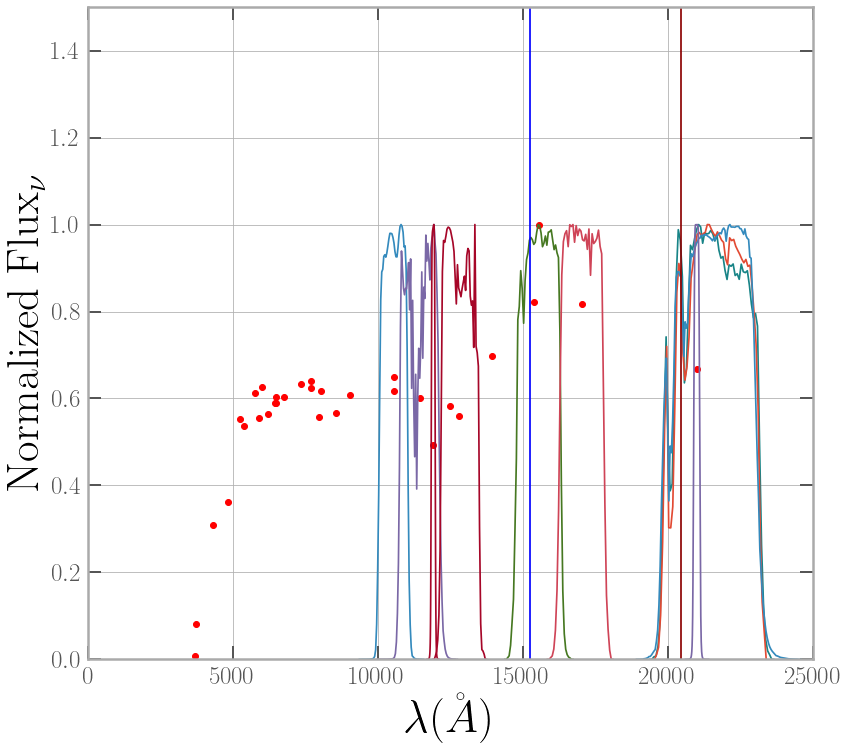

In [22]:
fig,ax=FancyPlot(r'$\lambda (\AA)$',r'Normalized Flux$_{\nu}$')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim(bottom=0,top=1.5)
ax.set_xlim(right=25000)
res_J1 = Table.read('~/Desktop/ProSpect_Filters'+'/J1'+'.csv')
res_J2= Table.read('~/Desktop/ProSpect_Filters'+'/J2'+'.csv')
res_J3= Table.read('~/Desktop/ProSpect_Filters'+'/J3'+'.csv')
res_Hs= Table.read('~/Desktop/ProSpect_Filters'+'/Hs'+'.csv')
res_Hl= Table.read('~/Desktop/ProSpect_Filters'+'/Hl'+'.csv')
res_Ks= Table.read('~/Desktop/ProSpect_Filters'+'/Ks'+'.csv')
res_tenisK = Table.read('~/Desktop/ProSpect_Filters'+'/tenisK'+'.csv')
res_KsHl=Table.read('~/Desktop/ProSpect_Filters'+'/KsHl'+'.csv')
res_NB209=Table.read('~/Desktop/ProSpect_Filters'+'/NB209'+'.csv')
res_NB118=Table.read('~/Desktop/ProSpect_Filters'+'/NB118'+'.csv')

waveJ1=res_J1['wave']
responseJ1=res_J1['response']
waveJ2=res_J2['wave']
responseJ2=res_J2['response']
waveJ3=res_J3['wave']
responseJ3=res_J3['response']

waveHs=res_Hs['wave']
responseHs=res_Hs['response']
waveHl=res_Hl['wave']
responseHl=res_Hl['response']
waveKs=res_Ks['wave']
responseKs=res_Ks['response']
wavetenisK=res_tenisK['wave']
responsetenisK=res_tenisK['response']
responsetenisK=responsetenisK/max(responsetenisK)
waveKsHl=res_KsHl['wave']
responseKsHl=res_KsHl['response']
responseKsHl=responseKsHl/max(responseKsHl)
waveNB209=res_NB209['wave']*10
responseNB209=res_NB209['response']
responseNB209=responseNB209/max(responseNB209)
waveNB118=res_NB118['wave']*10
responseNB118=res_NB118['response']
responseNB118=responseNB118/max(responseNB118)

plt.plot(waveJ1,responseJ1)
plt.plot(waveJ2,responseJ2)
plt.plot(waveJ3,responseJ3)
plt.plot(waveHs,responseHs)
plt.plot(waveHl,responseHl)
plt.plot(waveKs,responseKs)
plt.plot(wavetenisK,responsetenisK)
plt.plot(waveKsHl,responseKsHl)
plt.plot(waveNB209,responseNB209)
plt.plot(waveNB118,responseNB118)


plt.axvline(x=(redshift*5000+5000),c='darkred') #O3
plt.axvline(x=(redshift*3727+3727),c='blue') #O2
plt.scatter(lambda_c*10000,flux2/max(flux2),c='red')
# plt.scatter(lambda_c*10000,flux2,c='green')
# plt.plot(10**A,(log10(f_nu)/min(log10(f_nu))))#,label='Attenuated')


In [19]:
flux2

WFI_U38    3.027186e-08
U          3.540322e-07
B          1.333549e-06
IA484      1.568735e-06
IA527      2.395514e-06
WFI_V      2.321123e-06
IA574      2.655500e-06
V          2.402358e-06
IA598      2.715776e-06
IA624      2.442054e-06
R          2.550802e-06
WFI_Rc     2.614025e-06
IA651      2.552637e-06
IA679      2.608419e-06
IA738      2.742277e-06
IA767      2.771308e-06
I          2.705865e-06
IA797      2.417381e-06
F814W      2.667487e-06
IA856      2.452751e-06
Z          2.634922e-06
F098M     -9.900000e-05
J1         2.808136e-06
F105W      2.666863e-06
J2         2.600697e-06
NB118      2.137296e-06
F125W      2.518745e-06
J3         2.425388e-06
F140W      3.020368e-06
F160W      3.554740e-06
Hs         4.328534e-06
Hl         3.538543e-06
NB209      2.891485e-06
Ks        -1.050000e+02
tenisK    -1.050000e+02
KsHI      -1.050000e+02
IRAC_36    2.992723e-06
IRAC_45    3.034261e-06
IRAC_58    3.000026e-06
IRAC_80    2.546289e-06
Name: 498, dtype: float64

In [13]:
Montaguex = pd.read_csv(os.path.expanduser('~/Documents/forest/files/observations.dat')) 
Lumv=[]
for i in range(len(Montaguex)):
    potato=str(Montaguex['id'][i])
    galaxy_fit = pd.read_csv(os.path.expanduser('~/Documents/forest'+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    Lumv2 = galaxy_fit2.loc[10].apply(lambda x: float(x)).iloc[25] #32 for NB209, 25 for NB118
    Lumv.append(Lumv2)
Lumv

[0.0001127,
 6.095e-05,
 4.097e-05,
 0.0001048,
 8.6e-05,
 8.554e-05,
 7.552e-05,
 9.974e-05,
 2.803e-05,
 0.0001319,
 7.46e-05,
 2.921e-05,
 7.27e-05,
 0.0001884,
 4.52e-05,
 0.0001252,
 5.977e-05,
 4.082e-05,
 0.0001917,
 0.0001535,
 3.989e-05,
 6.249e-05,
 8.175e-05,
 0.0001547,
 3.962e-05,
 3.21e-05,
 0.0005548,
 8.295e-05,
 0.0001777,
 0.00016,
 2.409e-05,
 5.051e-05,
 9.765e-05,
 3.472e-05,
 6.748e-05,
 4.976e-05,
 4.205e-05,
 5.61e-05,
 0.0001246,
 7.323e-05,
 0.0001055,
 5.31e-05,
 0.0001313,
 5.443e-05,
 4.916e-05,
 4.026e-05,
 9.519e-05,
 4.93e-05,
 0.00014,
 7.791e-05,
 2.17e-05,
 9.049e-05,
 4.002e-05,
 4.7e-05,
 5.399e-05,
 3.862e-05,
 8.59e-05,
 4.305e-05,
 6.323e-05,
 7.51e-05,
 4.974e-05,
 0.0001836,
 6.9e-05,
 7.512e-05,
 3.847e-05,
 6.153e-05,
 5.512e-05,
 9.336e-05,
 0.0001169,
 5.016e-05,
 3.513e-05,
 4.918e-05,
 3.376e-05,
 0.0001487,
 4.51e-05,
 5.753e-05,
 2.828e-05,
 4.855e-05,
 0.0003712,
 8.168e-05,
 6.175e-05,
 4.68e-05,
 7.89e-05,
 7.3e-05,
 7.877e-05,
 4.84

In [177]:
a=['WFI_U38','U','B','IA484','IA527','WFI_V','IA574','V','IA598','IA624','R','WFI_Rc','IA651','IA679'
                  ,'IA738','IA767','I','IA797','IA856','Z','F098M','J1','F105W','J2','NB118','F125W','J3','F140W','F160W'
                  ,'Hs','Hl','NB209','Ks','tenisK','KsHI','IRAC_36','IRAC_45','IRAC_58','IRAC_80']

In [49]:
# float(galaxy_fit2.loc[1])
galaxy_fit2.loc[1].apply(lambda x: float(x))

WFI_U38    0.000001
U         -0.000002
B          0.000012
IA484      0.000034
IA527      0.000038
WFI_V      0.000056
IA574      0.000135
V          0.000059
IA598      0.000066
IA624      0.000065
R          0.000059
WFI_Rc     0.000060
IA651      0.000063
IA679      0.000064
IA738      0.000062
IA767      0.000074
I          0.000064
IA797      0.000066
F814W      0.000061
IA856      0.000052
Z          0.000044
F098M     -0.006962
J1         0.000065
F105W      0.000056
J2         0.000033
NB118      0.000055
F125W      0.000054
J3         0.000054
F140W     -0.006962
F160W      0.000058
Hs         0.000050
Hl         0.000132
NB209      0.000030
Ks         0.000059
tenisK     0.000075
KsHI       0.000097
IRAC_36    0.000066
IRAC_45    0.000063
IRAC_58    0.000109
IRAC_80    0.000065
Name: 1, dtype: float64

In [14]:
print(len(Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],2:len(Montague.iloc[0])][::2]*(1+redshift)))

40


/tmp/ipykernel_28561/502220095.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


Text(10000, 1e-07, '21896')

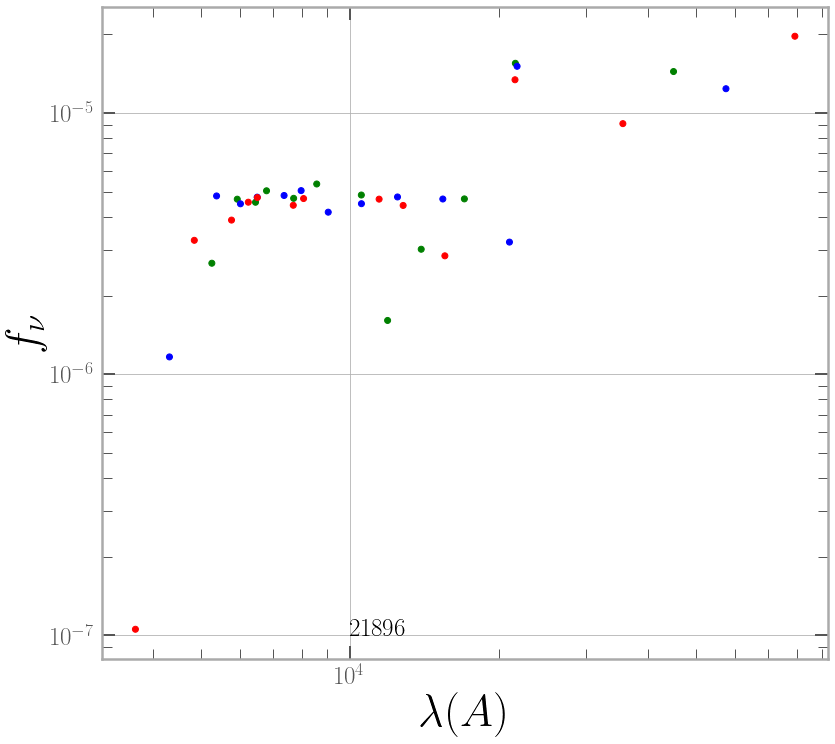

In [56]:
fig,ax=FancyPlot(r'$\lambda(A)$',r'$f_{\nu}$')
ax.set_yscale('log')
ax.set_xscale('log')
p=['red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red']
plt.scatter(x=lambda_cA,y=Montague.iloc[2,2:len(Montague.iloc[0])][::2]*(1+redshift),c=p)
plt.annotate(potato,xy=(10**4,10**-7))


(array([34., 18.,  9.,  4.,  2.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.826     ,  2.27066667,  3.71533333,  5.16      ,  6.60466667,
         8.04933333,  9.494     , 10.93866667, 12.38333333, 13.828     ,
        15.27266667, 16.71733333, 18.162     , 19.60666667, 21.05133333,
        22.496     ]),
 <BarContainer object of 15 artists>)

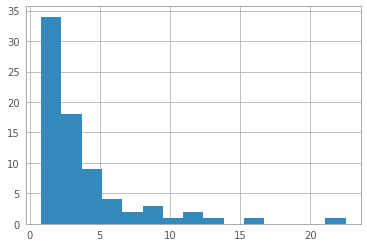

In [7]:
plt.hist(chestnut1,bins=15)

In [11]:
# Properties.iloc[305:377]
%store chestnut1
%store sunshine1
%store rainbow1

Stored 'chestnut1' (list)
Stored 'sunshine1' (list)
Stored 'rainbow1' (list)


Text(0.5, 0, 'wavelength in micrometers')

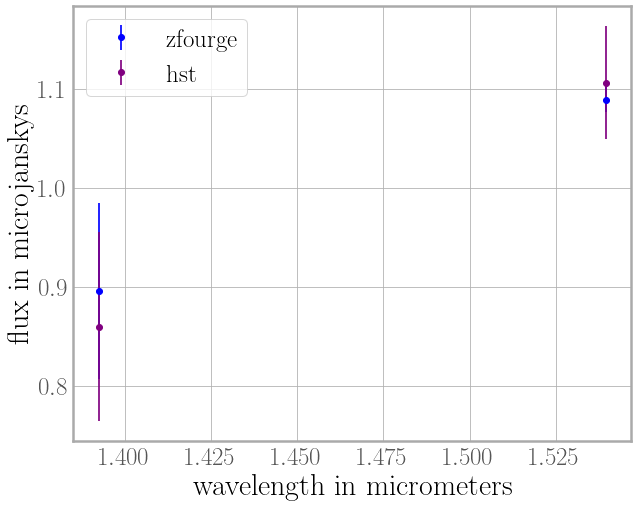

In [287]:
zfor= (0.8958838249999999,1.08906)
zforer=(0.08905097499999999,0.0126582)
hst = (0.859757,1.106007)
hster=(0.095607,0.057282)
xx=(1.3924,1.5396)
plt.figure(figsize=[10,8])
plt.errorbar(x=xx,y=zfor,yerr=zforer,fmt='o',c='blue',label='zfourge')
plt.errorbar(x=xx,y=hst,yerr=hster,fmt='o',c='purple',label='hst')
plt.legend()
plt.ylabel('flux in microjanskys')
plt.xlabel('wavelength in micrometers')